In [3]:
# Install unrar package to work with rar files

!pip install unrar==0.4

In [4]:
import os

from glob import glob
from multiprocessing import Pool, cpu_count

import cv2
import gdown
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from google.colab.patches import cv2_imshow

In [5]:
# Download dataset from google drive
# Source : https://www.kaggle.com/datasciencemlclub/burmesecharactersanddigit

url = 'https://drive.google.com/uc?id=1JbD-xMQmcq6lT5gDjE5WiwJJ13ywe7J6'
output = 'burmese_digits_and_characters.rar'

if not os.path.exists(output):
  gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1JbD-xMQmcq6lT5gDjE5WiwJJ13ywe7J6
To: /content/burmese_digits_and_characters.rar
129MB [00:04, 27.7MB/s]


In [6]:
# Unrar the downloaded dataset

source_folder = "BurmeseCharacterDataSets"

if not os.path.exists(source_folder):
  get_ipython().system_raw("unrar x '{}'".format(output))

In [7]:
# Unrar the digits and store them in a folder named 'data'

data_folder = "data"

if not os.path.exists(data_folder):
  get_ipython().system_raw("unrar x '{}/0.rar' '{}/'".format(source_folder, data_folder))
  get_ipython().system_raw("unrar x '{}/1.rar' '{}/'".format(source_folder, data_folder))
  get_ipython().system_raw("unrar x '{}/2.rar' '{}/'".format(source_folder, data_folder))
  get_ipython().system_raw("unrar x '{}/3.rar' '{}/'".format(source_folder, data_folder))
  get_ipython().system_raw("unrar x '{}/4.rar' '{}/'".format(source_folder, data_folder))
  get_ipython().system_raw("unrar x '{}/5.rar' '{}/'".format(source_folder, data_folder))
  get_ipython().system_raw("unrar x '{}/6.rar' '{}/'".format(source_folder, data_folder))
  get_ipython().system_raw("unrar x '{}/7.rar' '{}/'".format(source_folder, data_folder))
  get_ipython().system_raw("unrar x '{}/8.rar' '{}/'".format(source_folder, data_folder))
  get_ipython().system_raw("unrar x '{}/9.rar' '{}/'".format(source_folder, data_folder))

In [8]:
# Check the available number of images per class

class_0 = glob("{}/0/*.jpg".format(data_folder))
class_1 = glob("{}/1/*.jpg".format(data_folder))
class_2 = glob("{}/2/*.jpg".format(data_folder))
class_3 = glob("{}/3/*.jpg".format(data_folder))
class_4 = glob("{}/4/*.jpg".format(data_folder))
class_5 = glob("{}/5/*.jpg".format(data_folder))
class_6 = glob("{}/6/*.jpg".format(data_folder))
class_7 = glob("{}/7/*.jpg".format(data_folder))
class_8 = glob("{}/8/*.jpg".format(data_folder))
class_9 = glob("{}/9/*.jpg".format(data_folder))

print("Number of images per class")
print("Class 0: {}".format(len(class_0)))
print("Class 1: {}".format(len(class_1)))
print("Class 2: {}".format(len(class_2)))
print("Class 3: {}".format(len(class_3)))
print("Class 4: {}".format(len(class_4)))
print("Class 5: {}".format(len(class_5)))
print("Class 6: {}".format(len(class_6)))
print("Class 7: {}".format(len(class_7)))
print("Class 8: {}".format(len(class_8)))
print("Class 9: {}".format(len(class_9)))

Number of images per class
Class 0: 222
Class 1: 222
Class 2: 222
Class 3: 222
Class 4: 222
Class 5: 222
Class 6: 222
Class 7: 222
Class 8: 222
Class 9: 222


(219, 310, 3)


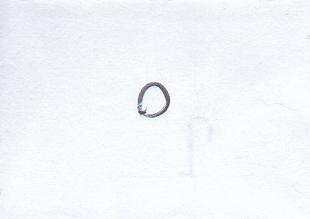

In [34]:
# Let's take a look at one of the image

img = cv2.imread(class_0[1])
print(img.shape)
cv2_imshow(img)

(200, 200, 3)


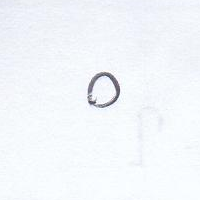

In [60]:
# It's quite big. Let's crop the image and make it square

crop_img = img[10:210, 50:250]
print(crop_img.shape)
cv2_imshow(crop_img)

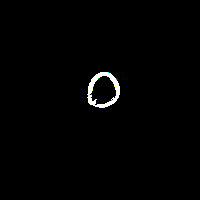

In [61]:
# Let's sharpen it to give more contrast

sharpened_image = cv2.threshold(crop_img, 200, 255,cv2.THRESH_BINARY_INV)
cv2_imshow(sharpened_image[-1])

In [62]:
# Preparing to store processed images
new_path = "data/processed/"

for i in range(10):
  if not os.path.exists(new_path + str(i)):
    os.makedirs(new_path + str(i))

In [63]:
# Apply processing steps to all the images in each image folder

def process_image(image):   
  img = cv2.imread(image)
  crop_img = img[10:210, 50:250]
  _, sharpened_image = cv2.threshold(img, 200, 255,cv2.THRESH_BINARY_INV)

  new_path = image.replace("data/", "data/processed/")
  cv2.imwrite(new_path, sharpened_image)


if __name__ == "__main__":
  with Pool(processes=cpu_count()-1) as pool:
    pool.map(process_image, class_0)
    pool.map(process_image, class_1)
    pool.map(process_image, class_2)
    pool.map(process_image, class_3)
    pool.map(process_image, class_4)
    pool.map(process_image, class_5)
    pool.map(process_image, class_6)
    pool.map(process_image, class_7)
    pool.map(process_image, class_8)
    pool.map(process_image, class_9)

In [65]:
# Prepare images for model training: data augmentation, split into train and validation sets, etc

batch_size = 32
image_size=[200, 200]
seed = 42
val_split = 0.3

np.seed(42)
tf.random.set_seed(42)

train_images = keras.preprocessing.image_dataset_from_directory(
    new_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=seed,
    validation_split=val_split,
    subset="training",
    interpolation="nearest")

val_images = keras.preprocessing.image_dataset_from_directory(
    new_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=image_size,
    shuffle=True,
    seed=seed,
    validation_split=val_split,
    subset="validation",
    interpolation="nearest")

# Prefect images so that I/O operations do not become a bottleneck
train_images = train_images.prefetch(buffer_size=batch_size)
val_images = val_images.prefetch(buffer_size=batch_size)

Found 2220 files belonging to 10 classes.
Using 1554 files for training.
Found 2220 files belonging to 10 classes.
Using 666 files for validation.


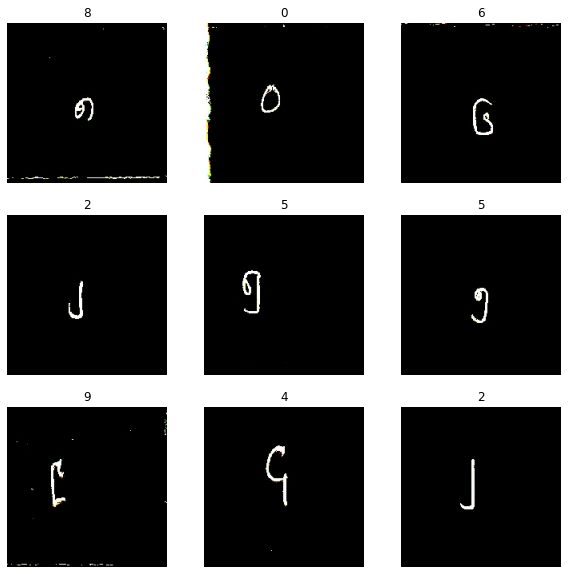

In [66]:
# Peek into the prepared images (sanity check)

plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(np.argmax(labels[i]))
        plt.axis("off")

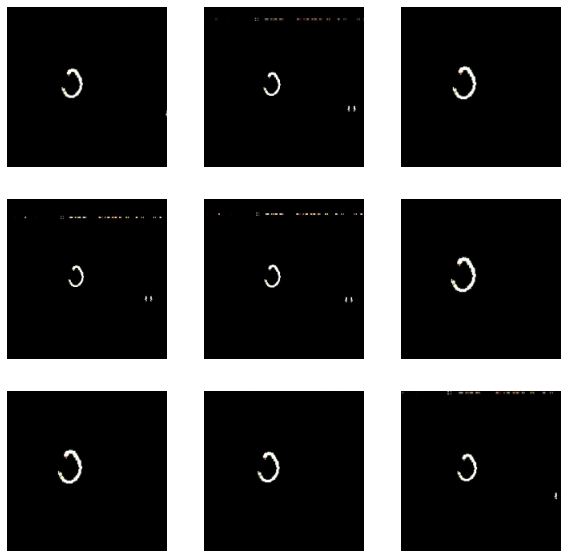

In [102]:
# Augment train data by adding a few data augmentation tricks (provides more training data)

data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomZoom(0.3),
  ]
)

plt.figure(figsize=(10, 10))
for images, _ in train_images.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [103]:
# Download a pre-trained model (we are doing transfer learning)

input_shape = image_size + [3]  # 3 channels (RGB)

base_model = keras.applications.InceptionV3(weights='imagenet',  # load imaget net weights, 
                                         input_shape=input_shape, 
                                         include_top=False,  # don't include the top layer (classification layer)
                                         pooling='avg')  # use average pooling method

base_model.trainable = False
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d_200 (Conv2D)             (None, 99, 99, 32)   864         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_200 (BatchN (None, 99, 99, 32)   96          conv2d_200[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 99, 99, 32)   0           batch_normalization_200[0][0]    
_______________________________________________________________________________________

In [109]:
# Build the final classification model

model = keras.Sequential()
model.add(keras.Input(shape=input_shape))
model.add(data_augmentation)
model.add(base_model)
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.2, seed=seed))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

model.compile(
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_25 (Sequential)   (None, 200, 200, 3)       0         
_________________________________________________________________
inception_v3 (Functional)    (None, 2048)              21802784  
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                5130      
Total params: 22,857,002
Trainable params: 1,054,218
Non-trainable params: 21,802,784
_________________________________________________________________


In [110]:
# Save the best model with lowest validation loss using checkpoint callback

checkpoint_path = os.path.join("checkpoint", "best_model")
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

In [111]:
epochs = 500

r = model.fit(train_images,
              epochs=epochs,
              validation_data=val_images,
              callbacks=[model_checkpoint_callback])

Epoch 1/500
49/49 [==============================] - 7s 134ms/step - loss: 15.8981 - accuracy: 0.1461 - val_loss: 4.7451 - val_accuracy: 0.3498
Epoch 2/500
49/49 [==============================] - 6s 124ms/step - loss: 8.0123 - accuracy: 0.2960 - val_loss: 4.5251 - val_accuracy: 0.4384
Epoch 3/500
49/49 [==============================] - 6s 126ms/step - loss: 5.4318 - accuracy: 0.3938 - val_loss: 3.0746 - val_accuracy: 0.5255
Epoch 4/500
49/49 [==============================] - 6s 127ms/step - loss: 3.7822 - accuracy: 0.4318 - val_loss: 2.2934 - val_accuracy: 0.5646
Epoch 5/500
49/49 [==============================] - 6s 125ms/step - loss: 2.5627 - accuracy: 0.4961 - val_loss: 1.7972 - val_accuracy: 0.5931
Epoch 6/500
49/49 [==============================] - 6s 130ms/step - loss: 1.9805 - accuracy: 0.5232 - val_loss: 1.6029 - val_accuracy: 0.6066
Epoch 7/500
49/49 [==============================] - 6s 121ms/step - loss: 1.7541 - accuracy: 0.5515 - val_loss: 1.6155 - val_accuracy: 0.549

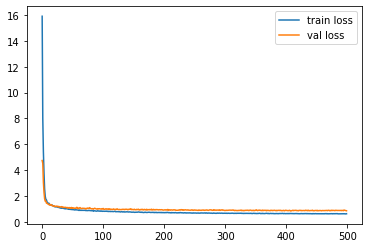

In [112]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()